In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit
import operator

In [12]:
# Colour palette
c = ["#006ba6", "#0496ff", "#82a9a1", "#ffbc42", "#ec674e", "#d81159", "#8f2d56"]

In [13]:
# Plot settings
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (4,3)  # good default size for column-width figure

In [14]:
def get_energy(bins):
    return 0.1263 * bins - 0.6

## Background readings
* Coarse gain: x10
* Fine gain: just under 12.5
* Integrate: 200 ns
* Diff: 500 ns

In [15]:
bin_arr = []
energy_arr = []

Text(0.5, 1.0, 'Background')

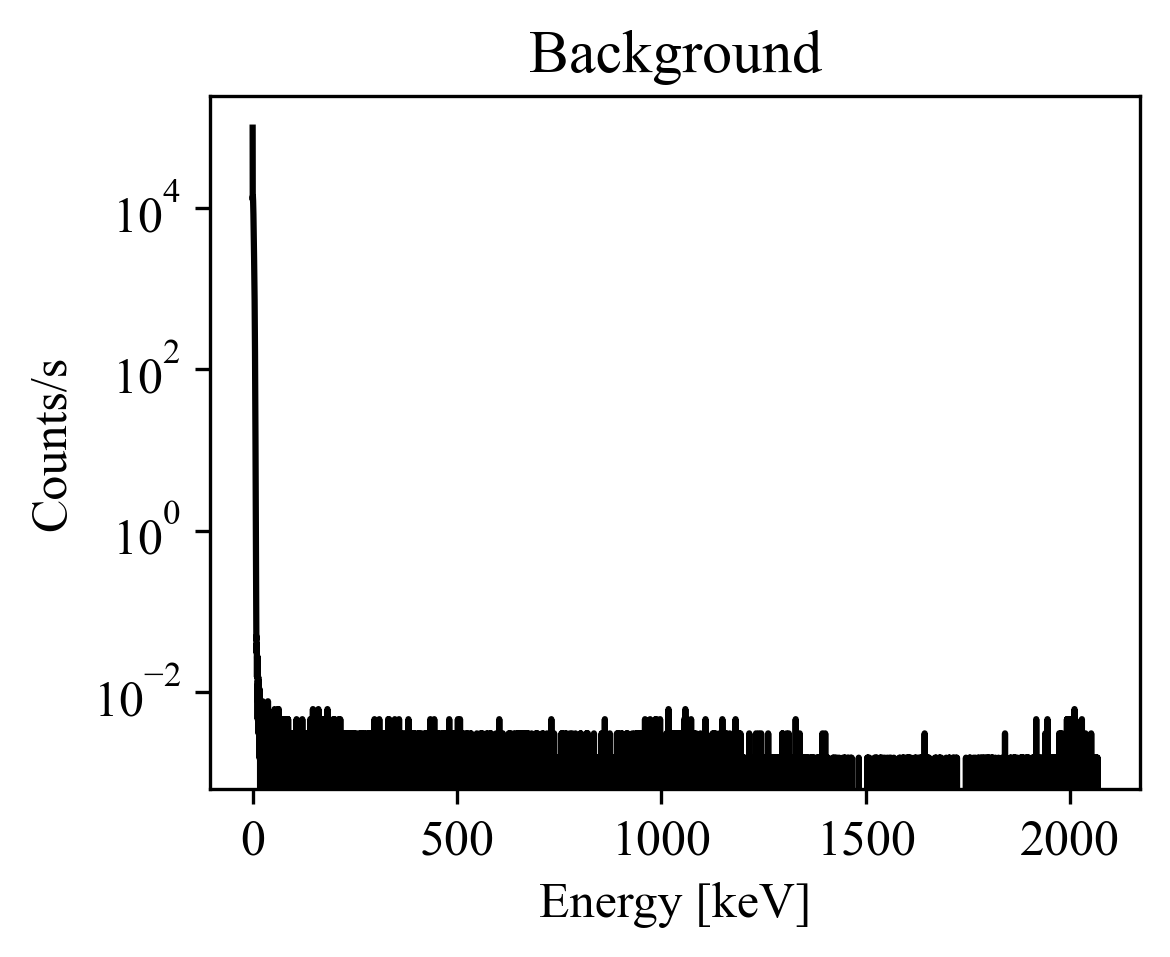

In [16]:
filepath = 'data/background_air.csv'
duration = 650  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

bg_ch = df['ch']  # bin
bg_n = df['n'] / duration  # counts/s

plt.plot(get_energy(bg_ch), bg_n, 'k')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s')
plt.yscale('log')
plt.title('Background')

## Spectrum 1: short sampling time
Looking for Pb peak around 351.9 keV (Pb 214) and 295 keV (Pb 214)

In [191]:
def gaussian(x, h, a, x0, s):
    return h + a * np.exp(-(x - x0) ** 2 / (2 * s ** 2))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mean: 295.39 +/- 0.15 (keV)
Height: 0.0072 +/- 0.0004 (counts / s)


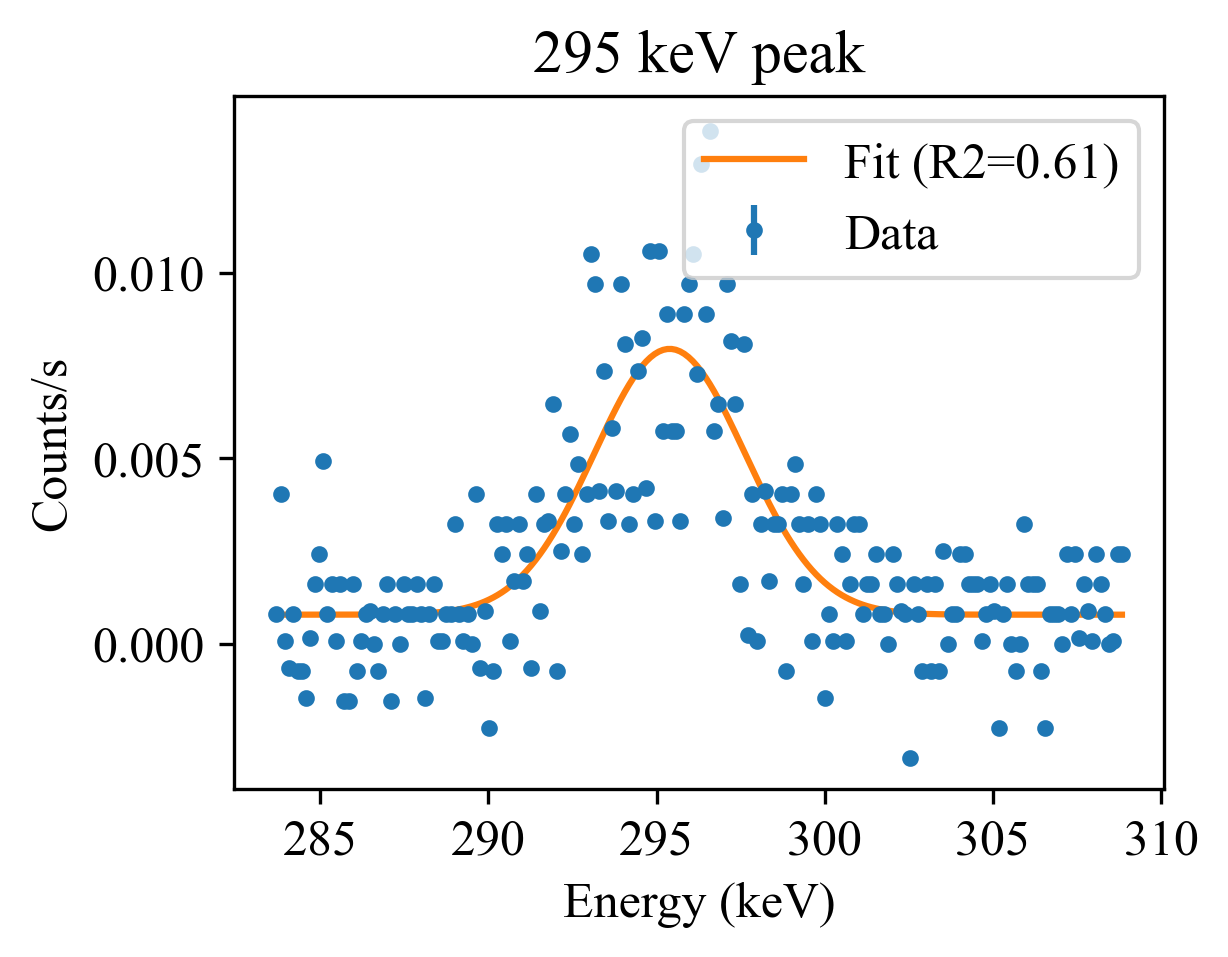

In [218]:
filepath = 'data/air_short.csv'
duration = 1238  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n  # counts / s
dn = np.sqrt(n) / duration

# Look for Pb peak at 295 keV (around bin 1000)
lower_idx = 2250
upper_idx = 2450

x = get_energy(ch[lower_idx:upper_idx])
y = n[lower_idx:upper_idx]
dy = dn[lower_idx:upper_idx]

plt.errorbar(x, y, yerr=dy, fmt='.', label="Data")

guess = [0, 0.05, 295, 2]  # h, a, x0, s
# plt.plot(x, gaussian(x, guess[0], guess[1], guess[2], guess[3]), '--', label="Guess")

popt, pcov = curve_fit(gaussian, x, y, p0=guess, maxfev=5000)
fit = gaussian(x, popt[0], popt[1], popt[2], popt[3])
r2 = 1 - (np.sum((y-fit)**2) / np.sum((y - np.mean(y)) ** 2))
plt.plot(x, fit, label=f"Fit (R2={r2:.2f})")

plt.title("295 keV peak")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts/s")
# plt.yscale('log')
plt.legend()

m295 = popt[2]
dm295 = np.sqrt(pcov[2][2])

h295 = popt[1]
dh295 = np.sqrt(pcov[1][1])

print(f"Mean: {m295:.2f} +/- {dm295:.2f} (keV)")
print(f"Height: {h295:.4f} +/- {dh295:.4f} (counts / s)")

Mean: 351.9 +/- 0.1 (keV)
Height: 0.0115 +/- 0.0004 (counts / s)


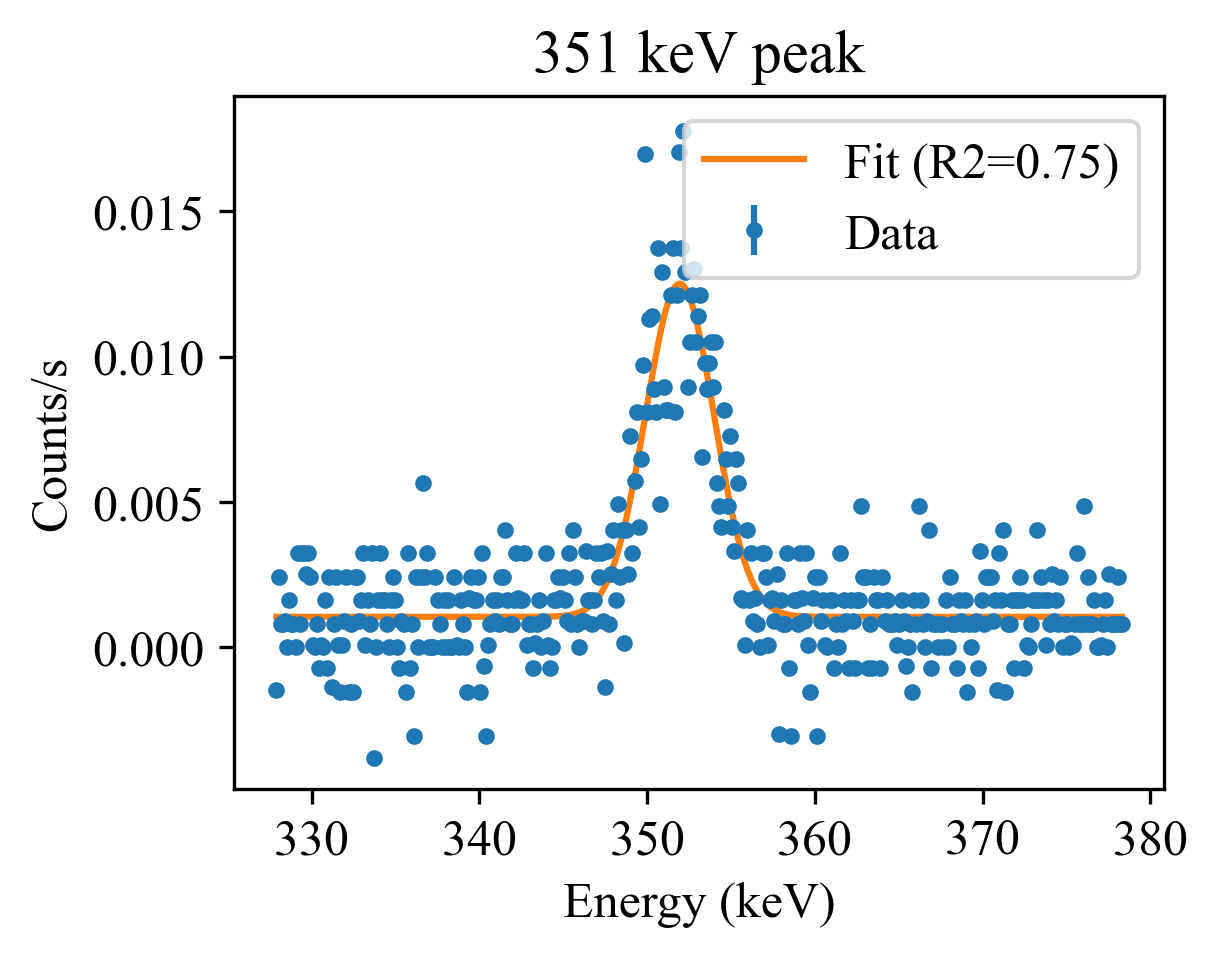

In [219]:
# Look for Pb peak at 351.9 keV (around bin 3000)
lower_idx = 2600
upper_idx = 3000
guess = [0, 0.015, 352, 2]  # h, a, x0, s

x = get_energy(ch[lower_idx:upper_idx])
y = n[lower_idx:upper_idx]
dy = dn[lower_idx:upper_idx]

plt.errorbar(x, y, yerr=dy, fmt='.', label="Data")

# plt.plot(x, gaussian(x, guess[0], guess[1], guess[2], guess[3]), '--', label="Guess")

popt, pcov = curve_fit(gaussian, x, y, p0=guess, maxfev=5000)
fit = gaussian(x, popt[0], popt[1], popt[2], popt[3])
r2 = 1 - (np.sum((y-fit)**2) / np.sum((y - np.mean(y)) ** 2))
plt.plot(x, fit, label=f"Fit (R2={r2:.2f})")

plt.title("351 keV peak")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts/s")
plt.legend()

m351 = popt[2]
dm351 = np.sqrt(pcov[2][2])

h351 = popt[1]
dh351 = np.sqrt(pcov[1][1])

print(f"Mean: {m351:.1f} +/- {dm351:.1f} (keV)")
print(f"Height: {h351:.4f} +/- {dh351:.4f} (counts / s)")

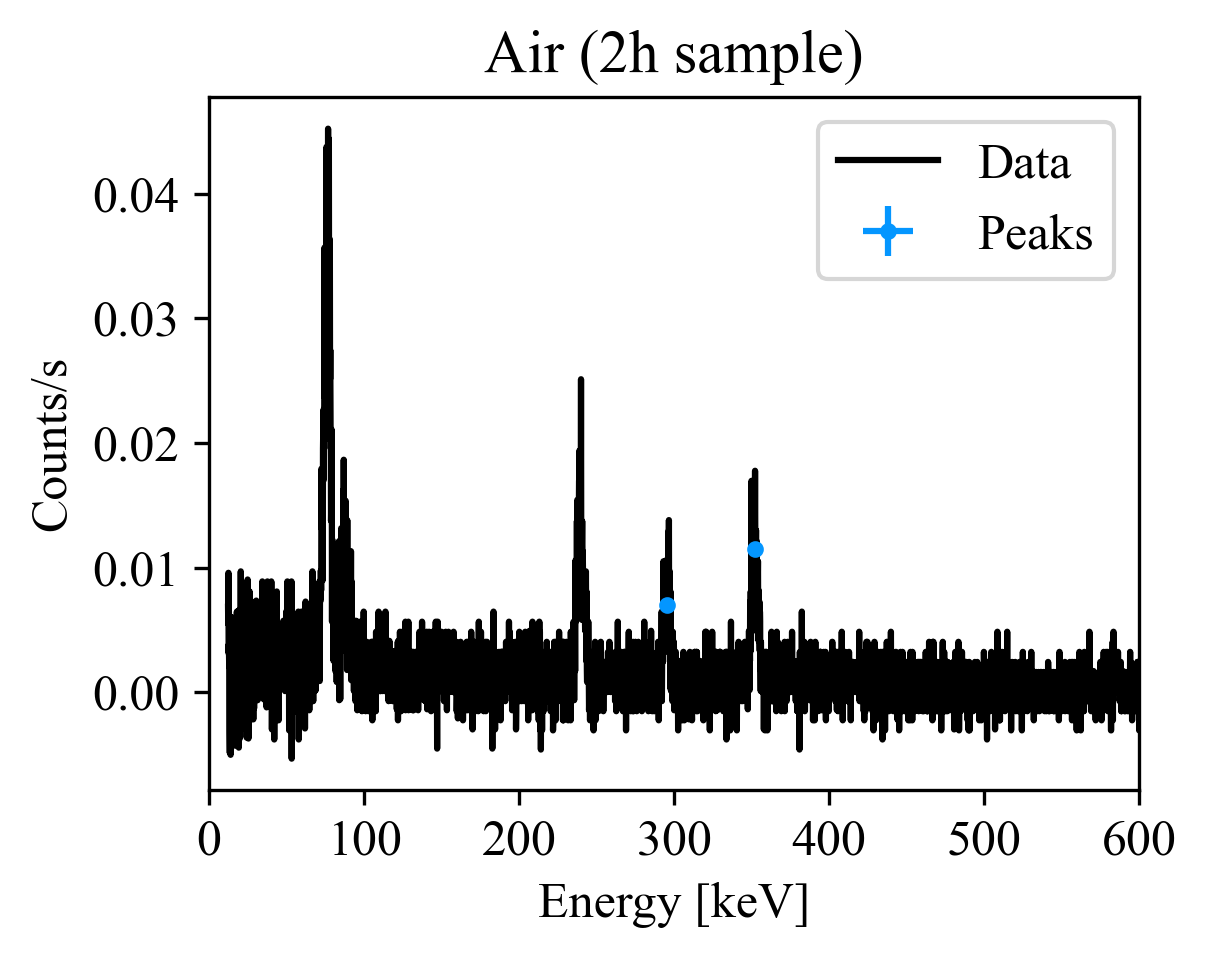

In [194]:
plt.plot(get_energy(ch)[100:], n[100:], 'k', label="Data")
plt.errorbar([m295, m351], [h295, h351], xerr=[dm295, dm351], yerr=[dh295, dh351], fmt='.', color=c[1], label="Peaks")

plt.xlim(0, 600)
# plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s')
plt.title('Air (2h sample)')
plt.legend()

## Spectrum 2: long sampling time
Look for peaks at 77 keV (Pb 214) and 238.6 keV (Pb 214)

In [195]:
filepath = 'data/air_long.csv'
duration = 1800  # s

df = pd.read_csv(filepath, header=7)
df.columns = ['ch', 'n']

ch = df['ch']  # bin
n = df['n'] / duration - bg_n  # counts/s
dn = np.sqrt(n) / duration

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mean: 76.17 +/- 0.07 (keV)
Height: 0.032 +/- 0.001 (counts / s)


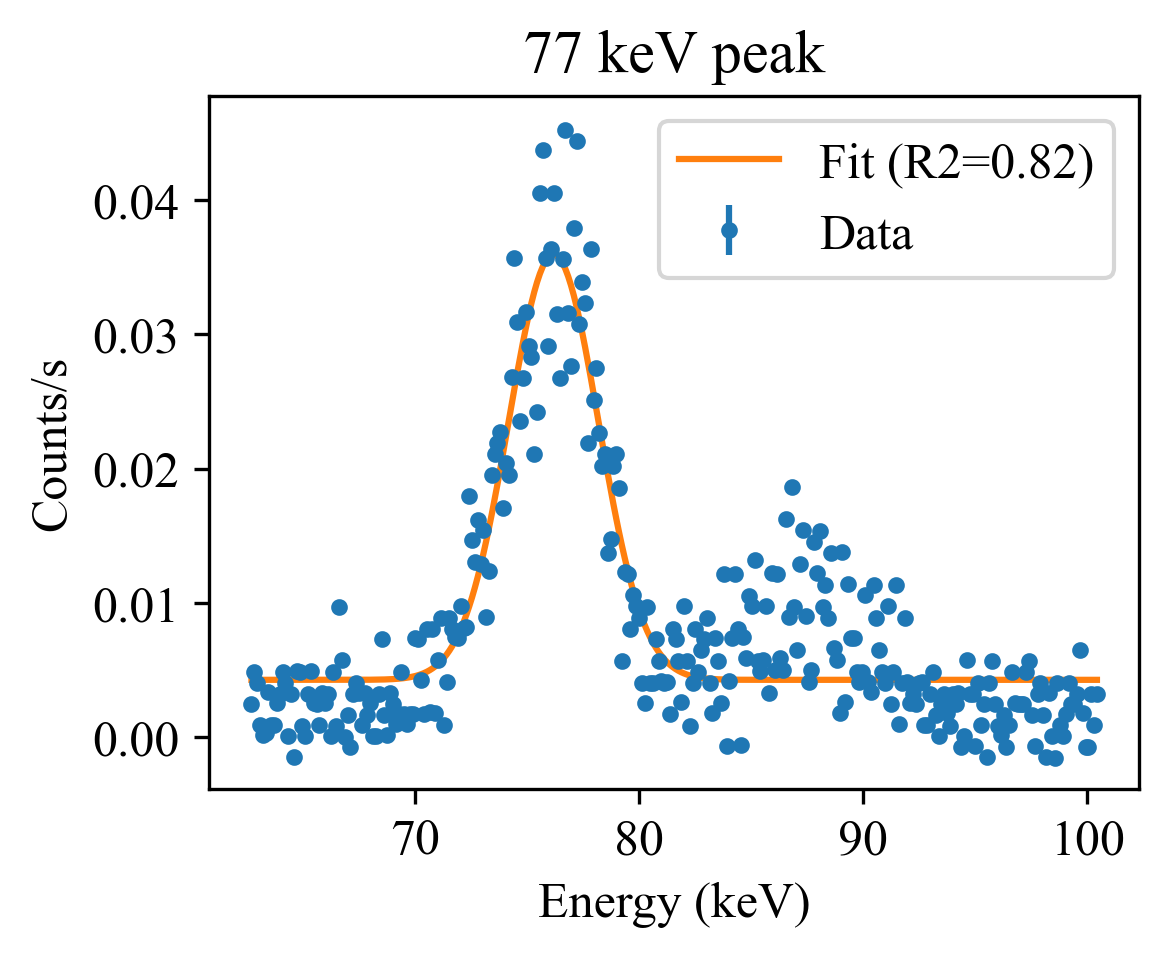

In [225]:
# Look for Pb peak at 77 keV (around bin 1000)
lower_idx = 500
upper_idx = 800

x = get_energy(ch[lower_idx:upper_idx])
y = n[lower_idx:upper_idx]
dy = dn[lower_idx:upper_idx]

plt.errorbar(x, y, yerr=dy, fmt='.', label="Data")

guess = [0, 0.05, 77, 2]  # h, a, x0, s
# plt.plot(x, gaussian(x, guess[0], guess[1], guess[2], guess[3]), '--', label="Guess")

popt, pcov = curve_fit(gaussian, x, y, p0=guess, maxfev=5000)
fit = gaussian(x, popt[0], popt[1], popt[2], popt[3])
r2 = 1 - (np.sum((y-fit)**2) / np.sum((y - np.mean(y)) ** 2))
plt.plot(x, fit, label=f"Fit (R2={r2:.2f})")

plt.title("77 keV peak")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts/s")
plt.legend()

m77 = popt[2]
dm77 = np.sqrt(pcov[2][2])

h77 = popt[1]
dh77 = np.sqrt(pcov[1][1])

print(f"Mean: {m77:.2f} +/- {dm77:.2f} (keV)")
print(f"Height: {h77:.3f} +/- {dh77:.3f} (counts / s)")

Mean: 239.31 +/- 0.09 (keV)
Height: 0.0136 +/- 0.0005 (counts / s)


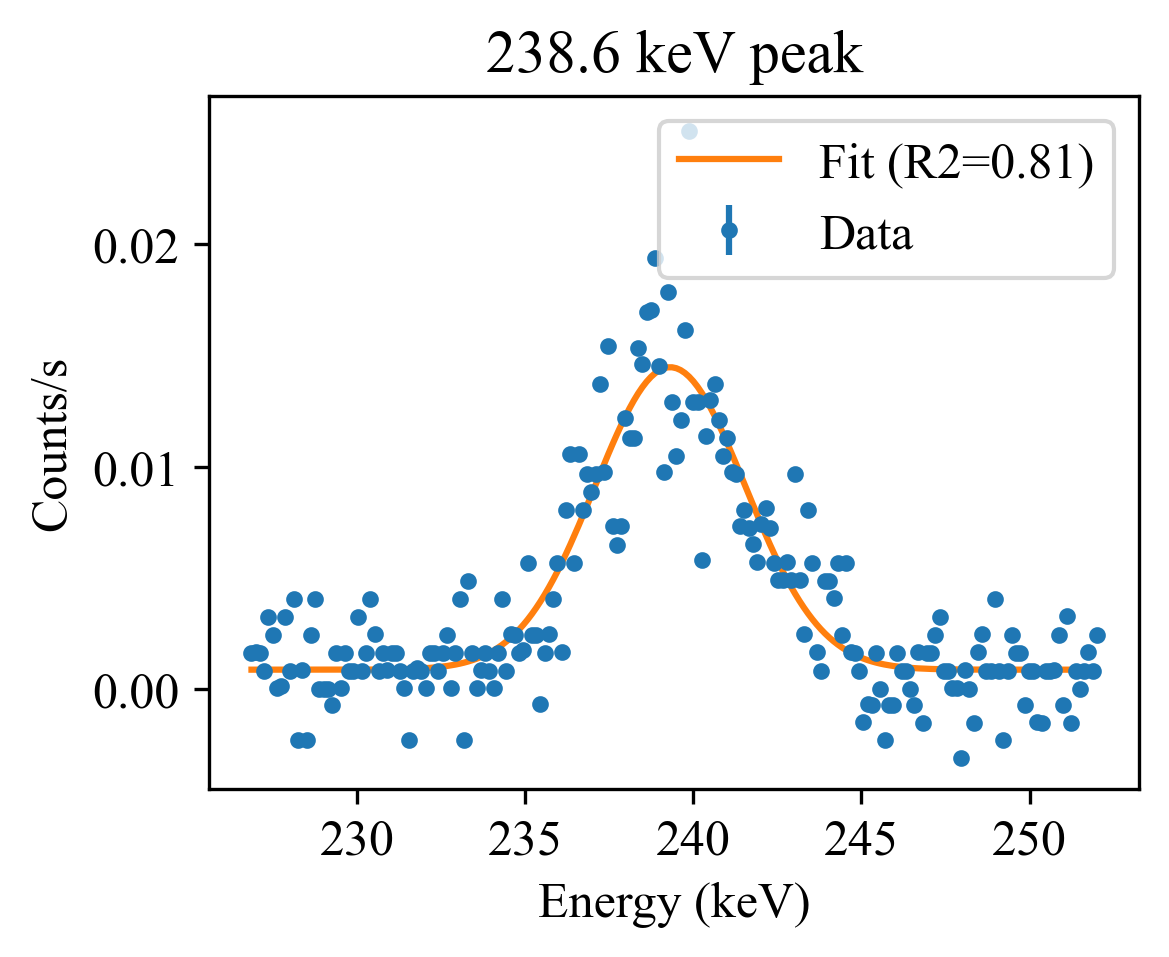

In [224]:
# Look for Pb peak at 238.6 keV
lower_idx = 1800
upper_idx = 2000

x = get_energy(ch[lower_idx:upper_idx])
y = n[lower_idx:upper_idx]
dy = dn[lower_idx:upper_idx]

plt.errorbar(x, y, yerr=dy, fmt='.', label="Data")

guess = [0, 0.05, 238, 2]  # h, a, x0, s
# plt.plot(x, gaussian(x, guess[0], guess[1], guess[2], guess[3]), '--', label="Guess")

popt, pcov = curve_fit(gaussian, x, y, p0=guess, maxfev=5000)
fit = gaussian(x, popt[0], popt[1], popt[2], popt[3])
r2 = 1 - (np.sum((y-fit)**2) / np.sum((y - np.mean(y)) ** 2))
plt.plot(x, fit, label=f"Fit (R2={r2:.2f})")

plt.title("238.6 keV peak")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts/s")
plt.legend()

m238 = popt[2]
dm238 = np.sqrt(pcov[2][2])

h238 = popt[1]
dh238 = np.sqrt(pcov[1][1])

print(f"Mean: {m238:.2f} +/- {dm238:.2f} (keV)")
print(f"Height: {h238:.4f} +/- {dh238:.4f} (counts / s)")

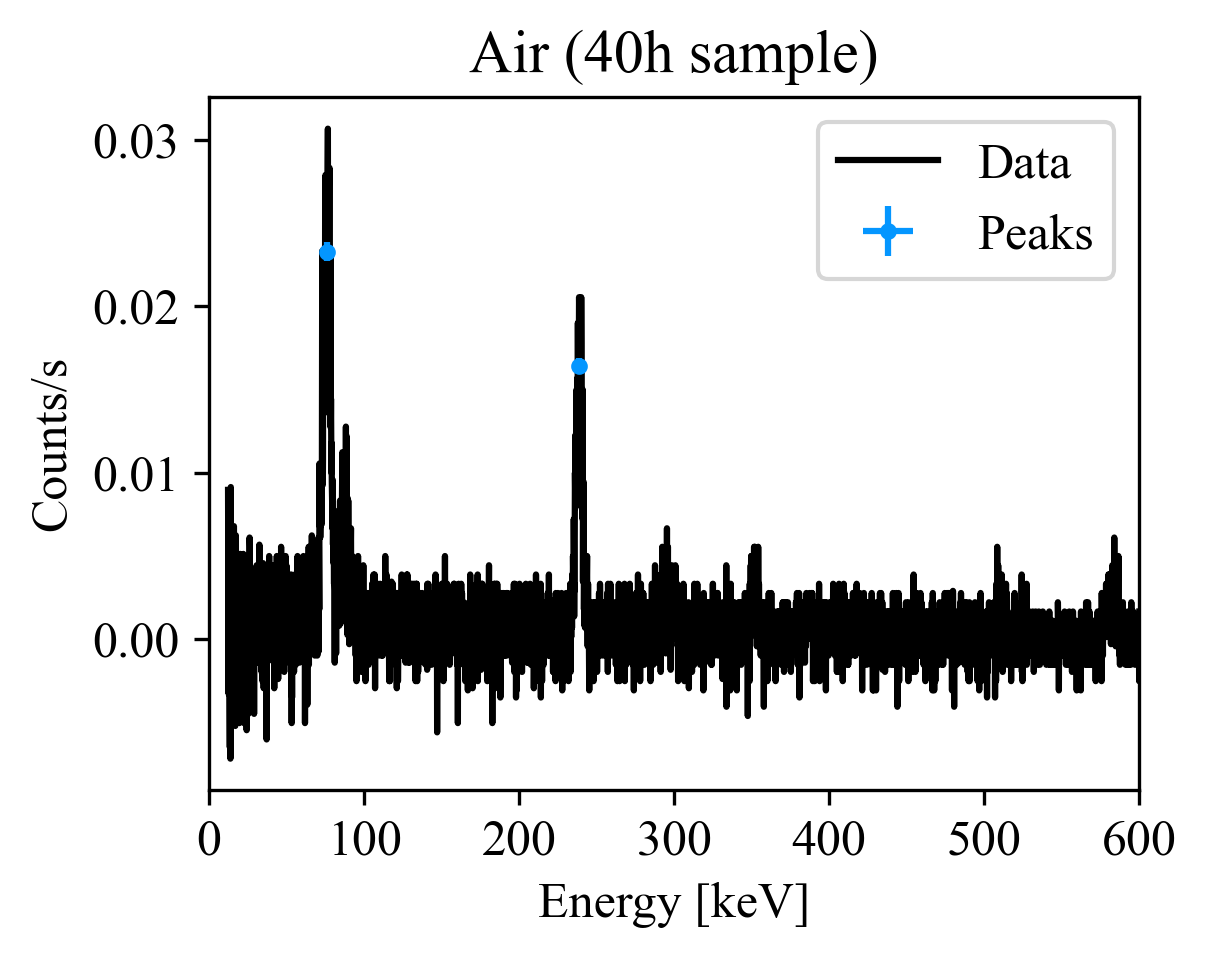

In [198]:
plt.plot(get_energy(ch)[100:], n[100:], 'k', label="Data")
plt.errorbar([m77, m238], [h77, h238], xerr=[dm77, dm238], yerr=[dh77, dh238], fmt='.', color=c[1], label="Peaks")

plt.xlim(0, 600)
# plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts/s')
plt.title('Air (40h sample)')
plt.legend()